# 도형 그리기

In [1]:
from manim import *

config.media_width = "75%"
config.verbosity = "WARNING"

Manim Community v0.17.2

도형을 그려봅시다. 지난 시간의 `직접 해보기`와 같이 작성하면 됩니다.

| parameters | meaning |
| --- | --- |
| color | 색상 |
| height | 높이 |
| width | 너비 |
| stroke_color | 테두리 색상 |
| fill_color | 채우기 색상 |
| fill_opacity | 불투명도 |

이번에는 위의 특성들을 응용하며 다양한 도형을 그려봅시다.

In [2]:
%%manim -qm Shapes

class Shapes(Scene):
    def construct(self):
        circle = Circle(stroke_color='#87C2A5', fill_color='#87C2A5', fill_opacity=1)
        square = Square(stroke_color='#525893', fill_color='#525893', fill_opacity=1)
        triangle = Triangle(stroke_color='#E07A5F', fill_color='#E07A5F', fill_opacity=1)

        circle.shift(LEFT)
        square.shift(UP)
        triangle.shift(RIGHT)

        self.play(Create(triangle), run_time=1)
        self.play(Create(square), run_time=1)
        self.play(Create(circle), run_time=1)
        self.wait()

더 공부하고 싶다면 [여기](https://docs.manim.community/en/stable/reference/manim.mobject.geometry.html)를 참고하세요.

# 글 작성하기

아무래도 우리는 수식을 활용해서 작성할 일이 많을 테니까, 영상에 도형 Mobject뿐만 아니라 글 Mobject도 넣을 줄 알아야겠죠? 글을 넣는 방법은 두 가지가 있습니다.
1. Using Pango - `text_mobject` <br>
  우리가 생각하는 보통의 글자입니다.

2. Using LaTeX - `tex_mobject` <br>
  LaTeX 문법을 따르는, 수식 입력 문자입니다.

In [3]:
%%manim -qm HelloWorld

class HelloWorld(Scene):
    def construct(self):
        text = Text("Hello world!", font_size=144)
        self.play(Write(text))

글의 서식은 다양하게 바꿔볼 수 있어요. 폰트부터 볼드체 표현, 그 외에 다양한 모습을 직접 바꿔가며 해 보세요.

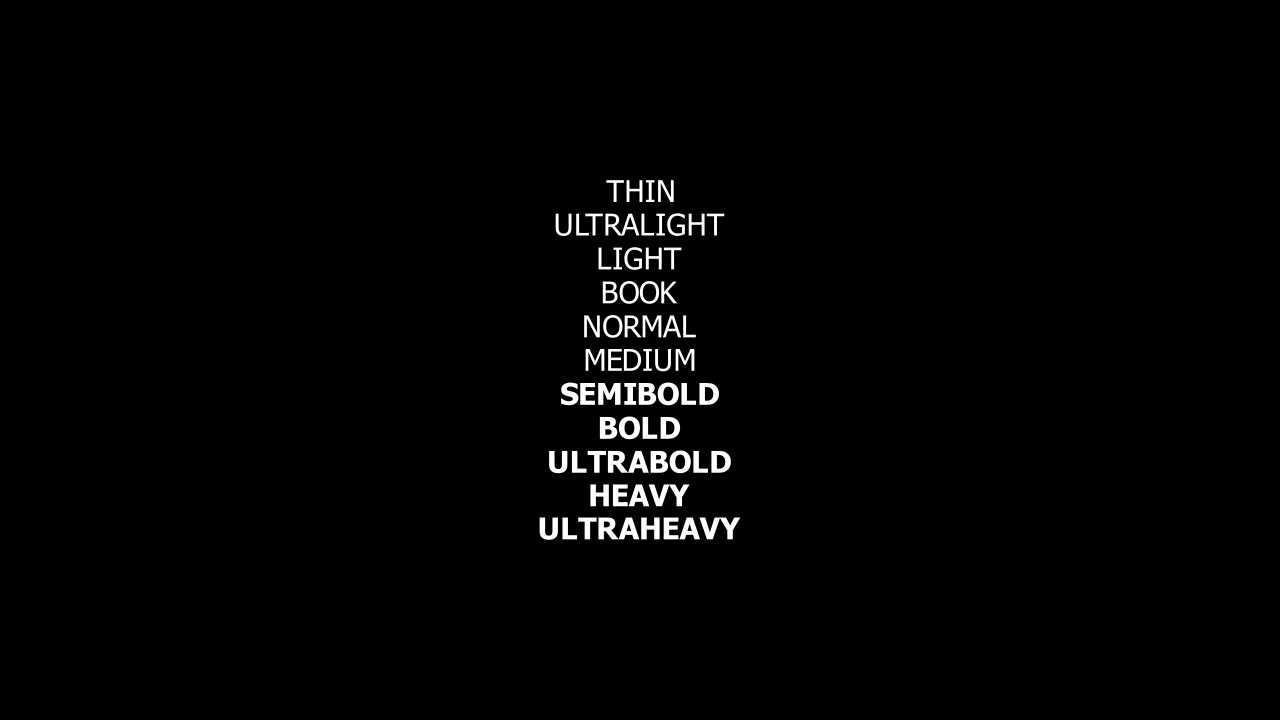

In [9]:
%%manim -qm DifferentWeight

class DifferentWeight(Scene):
    def construct(self):
        import manimpango

        g = VGroup()
        weight_list = dict(
            sorted(
                {
                    weight: manimpango.Weight(weight).value
                    for weight in manimpango.Weight
                }.items(),
                key=lambda x: x[1],
            )
        )
        for weight in weight_list:
            g += Text(weight.name, weight=weight.name, font="Open Sans")
        self.add(g.arrange(DOWN).scale(0.5))

In [5]:
%%manim -qm HelloLatex

class HelloLatex(Scene):
    def construct(self):
        line = Tex("Hello "r"\LaTeX""!")

        self.play(Write(line))
        self.wait(1)

더 공부하고 싶다면 [여기](https://docs.manim.community/en/stable/guides/using_text.html)를 참고하세요.

# 직접 해보기 - 글 및 수식 작성하기

In [8]:
%%manim -qm SchrodingerEquation

class SchrodingerEquation(Scene):
    def construct(self):
        line = Tex(r"$-\frac{\hbar^2}{2m}\nabla^2\psi+V\psi=E\psi$")

        self.play(Write(line))
        self.wait(1)

# Animation 기초

In [2]:
from manim import *

config.media_width = "75%"
config.verbosity = "WARNING"

Manim Community v0.17.2

In [5]:
%%manim -qm MovingArrow

class MovingArrow(Scene):
  def construct(self):
    rect = Rectangle(color=WHITE, height=3, width=4).to_edge(UL)
    circ = Circle().to_edge(UR)
    arrow = Line(start = rect.get_right(), end = circ.get_left(), buff=0.2).add_tip()

    self.play(Create(VGroup(rect, circ, arrow)), run_time=4)
    self.wait()
    self.play(rect.animate.to_edge(DL))

In [6]:
%%manim -qm MovingArrow

class MovingArrow(Scene):
  def construct(self):
    rect = Rectangle(color=WHITE, height=3, width=4).to_edge(UL)
    circ = Circle().to_edge(UR)
    arrow = always_redraw(
      lambda : Line(start = rect.get_right(), end = circ.get_left(), buff=0.2).add_tip()
    )
    self.play(Create(VGroup(rect, circ, arrow)), run_time=4)
    self.wait()
    self.play(rect.animate.to_edge(DL))

# 직접 해보기

In [7]:
%%manim -qm VelocityMark

class VelocityMark(Scene):
  def construct(self):
    circ = Circle(radius=1, color=BLUE).to_edge(UL)
    line = Tex(r"$v=5\text{m/s}$").to_edge(DL)
    arrow = always_redraw(
      lambda : Line(start = line.get_top(), end = circ.get_bottom(), buff=0.2).add_tip()
    )
    self.play(Create(VGroup(circ, line, arrow)), run_time=4)
    self.wait()
    self.play(circ.animate.to_edge(UR))